<a href="https://colab.research.google.com/github/2303a51514/2303a51514-batch-22/blob/main/ieee_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 99.85%


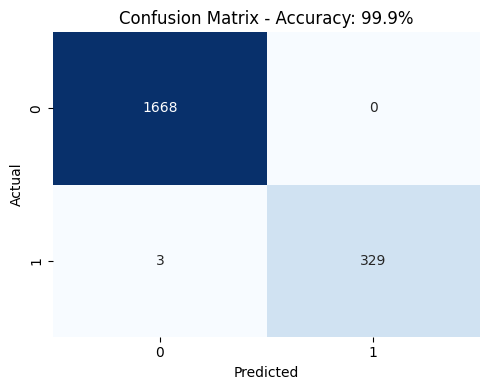

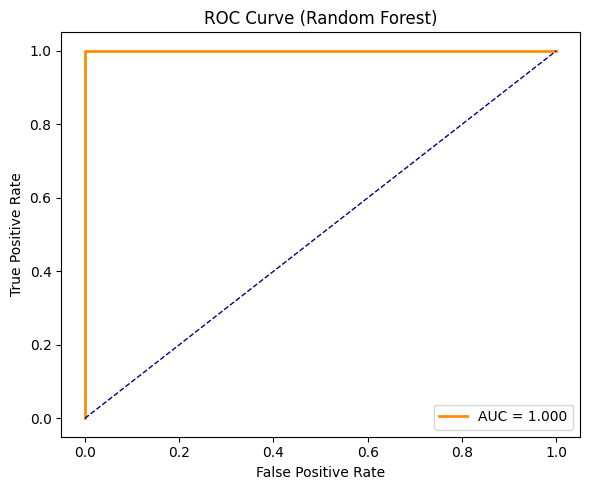

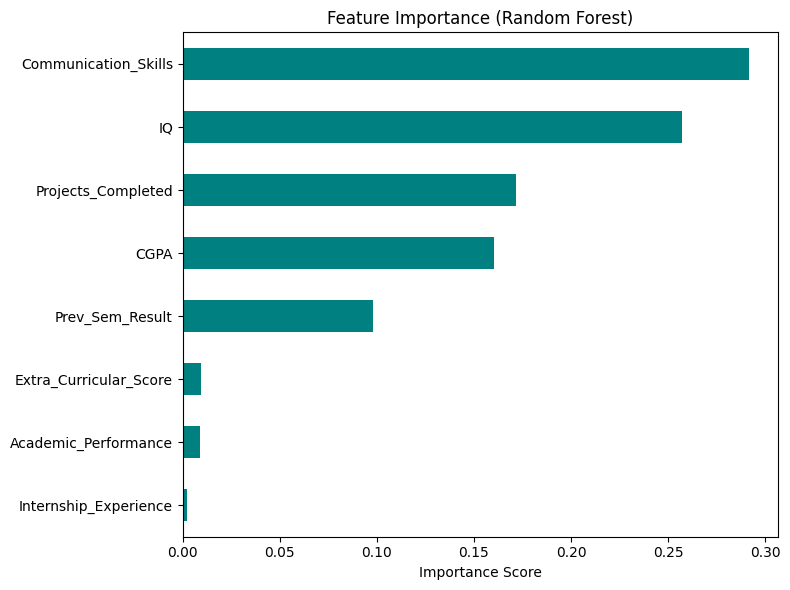

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# 1. LOAD DATA
file_path = "/content/college_student_placement_dataset.csv" # Corrected file path
df = pd.read_csv(file_path).drop(columns=["College_ID"])

# Encode categorical
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})

X, y = df.drop(columns=["Placement"]), df["Placement"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# 2. LIGHTER TUNING
param_rf = {
    "n_estimators": [200, 300, 400],
    "max_depth": [8, 12, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"]
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                              param_distributions=param_rf,
                              n_iter=10, cv=3, scoring="accuracy",
                              n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

# 3. CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Accuracy: {acc*100:.1f}%")
plt.tight_layout()
plt.show()

# 4. ROC CURVE
y_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 5. FEATURE IMPORTANCE
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
importances.plot(kind="barh", color="teal")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()